<a href="https://colab.research.google.com/github/park-geun-hyeong/Computer_Vision/blob/main/CH2/OPenCV_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.3


In [2]:
!git clone  https://github.com/chulminkw/DLCV

Cloning into 'DLCV'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 234 (delta 32), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (234/234), 142.72 MiB | 28.17 MiB/s, done.
Resolving deltas: 100% (89/89), done.


## 다양한 library를 통한 image 처리 방법

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

- opencv를 이용하여 image 처리

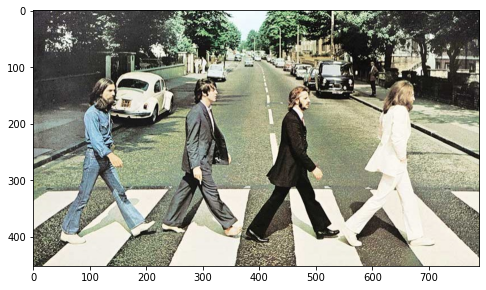

In [4]:
path = '/content/DLCV/data/image/'

file_path = path+'beatles_low.jpg'


img = cv2.imread(file_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (8,8))
plt.imshow(img)
plt.show()

- PIL의 Image를 사용한 image처리


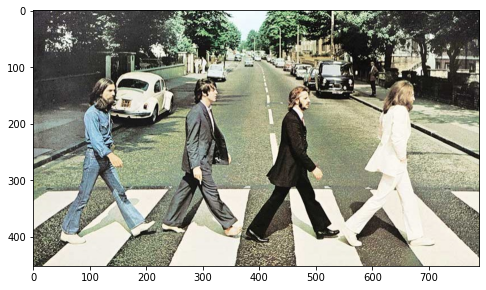

In [5]:
from PIL import Image

img1 = Image.open(file_path)
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()

- skimage의 io를 사용한 image 처리

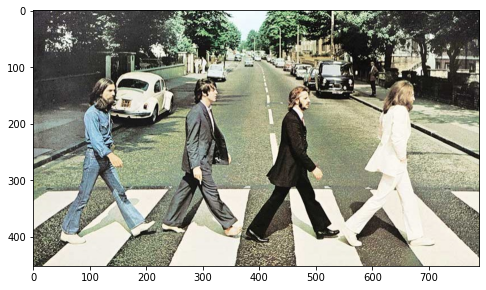

In [6]:
from skimage import io

img2 = io.imread(file_path)

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()

In [7]:
print(type(img),type(img1),type(img2))
print(img.shape, img2.shape)

<class 'numpy.ndarray'> <class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'numpy.ndarray'>
(452, 790, 3) (452, 790, 3)


- cv2.imwrite 사용한 image처리 (imwrite함수는 image를 RGB로 저장한다.)

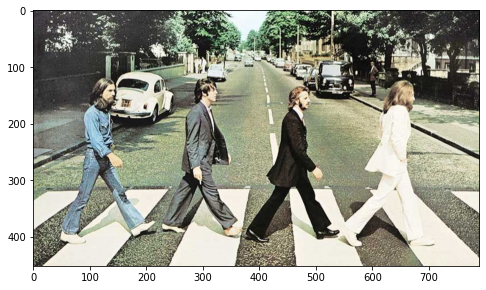

In [8]:
img3 = cv2.imread(file_path)
cv2.imwrite(path+'vitles02.jpg', img3) ##cv2.imwrite 함수는 RGB로 파일을 저장한다.

plt.figure(figsize=(8,8))
img4 = plt.imread(path+'vitles02.jpg')
plt.imshow(img4)
plt.show()

##OpneCV를 사용한 영상 처리

In [9]:
path = '/content/DLCV/data/video/'
video_input_path = path+'Night_Day_Chase.mp4'
video_output_path = path+'Night_Day_Chase_output.avi'

cap = cv2.VideoCapture(video_input_path) #video 를 객체로 저장
codec = cv2.VideoWriter_fourcc(*'XVID') #XVID형태로 변환

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))) #video size확인
vid_FPS = cap.get(cv2.CAP_PROP_FPS) #video FPS확인

vid_write = cv2.VideoWriter(video_output_path, codec, vid_FPS, vid_size) ##cv2.VideoWriter 메쏘드는 VideoCapture로 읽어들어온 개별 Frame을 동영상 파일로 저장

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) #frame count

print("frame_cnt: {}, frame_size: {}, frame_FPS: {:.3f}".format(frame_cnt, vid_size, vid_FPS)) 

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print("frame_cnt: {}, frame_size: {}, frame_FPS: {:.3f}".format(frame_cnt, vid_size, vid_FPS))

frame_cnt: 1383, frame_size: (1216, 516), frame_FPS: 28.282


In [ ]:
import time 

start=time.time()

green = (0,255,0)
red = (255,0,0)

idx=0

while True:
    hasframe,img_frame = cap.read() #VideoCapture 객체를 read 할경우 반환 여부에 대한 (True or False)와 하나의 Frame 반환

    if not hasframe:
        print("더이상 출력할 Frame이 없습니다.")
        break

    idx+=1
    print('index: ',idx,'complete')
    cv2.rectangle(img_frame,(300,100,800,400), color=green, thickness=2) #frame중앙에 임의의 rectangle 설정
    caption = 'frame {}'.format(idx)
    cv2.putText(img_frame, caption, (300,95), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=red, thickness=1) #rectangle 좌상단에 text 설정

    vid_write.write(img_frame)

print("complete time:{:.4f}".format(time.time() - start))
vid_write.release()
cap.release()

